<a href="https://colab.research.google.com/github/ryandale7/ML-on-Graphs/blob/main/3_Advanced_Network_Properties.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prerequisite: Data set

## Loading the email-Eu-core Dataset in Google Colab

In this notebook, we will obtain and load the **email-Eu-core** dataset using:

1. **Automated Download** via `curl` and `gunzip` in Colab.  
2. **Manual Upload** by downloading and extracting locally, then uploading to Google Drive.

Finally, we will **inspect** the dataset by creating a simple directed graph using NetworkX.


## 1) Automated Download and Extraction

In this approach, we will:

1. Mount Google Drive.
2. Create or navigate to a `Data` subfolder under `Colab Notebooks`.
3. Use `curl` to download the `.gz` file from the SNAP repository.
4. Extract (unzip) the `.gz` file using `gunzip`.
5. Verify the extracted `email-Eu-core.txt`.
6. Load the dataset into NetworkX.


In [8]:
# CODE CELL: Automated Download and Extraction

from google.colab import drive

drive.mount("/content/drive")

# Change directory to Colab Notebooks folder
%cd /content/drive/MyDrive/Colab\ Notebooks

# Create a Data folder if it doesn't exist
import os

if not os.path.exists("Data"):
    os.makedirs("Data")

# Navigate into Data
%cd Data

# Download the dataset (email-Eu-core.txt.gz) using curl
!curl -LO "https://snap.stanford.edu/data/email-Eu-core.txt.gz"

# Extract (unzip) the file
!gunzip -f email-Eu-core.txt.gz

# List files to confirm extraction
!ls -lh

# Now, let's load the dataset with NetworkX
import networkx as nx

data_path = "/content/drive/MyDrive/Colab Notebooks/Data/email-Eu-core.txt"
G = nx.read_edgelist(data_path, create_using=nx.DiGraph)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Sample edges:", list(G.edges())[:10])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks
/content/drive/MyDrive/Colab Notebooks/Data
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 79754  100 79754    0     0  66203      0  0:00:01  0:00:01 --:--:-- 66240
total 192M
-rw------- 1 root root 6.4M Jan 10 19:22 cit-HepPh.txt
-rw------- 1 root root 1.1M Jan 10 19:11 CollegeMsg.txt
-rw------- 1 root root  13M Jan 10 18:46 com-amazon.ungraph.txt
-rw------- 1 root root 1.1M Jan 10 19:22 com-lj.top5000.cmty.txt
-rw------- 1 root root 7.5M Jan 10 19:22 com-orkut.top5000.cmty.txt
drwx------ 2 root root 4.0K Jan  6 14:56 congress_network
-rw------- 1 root root 190K Jan 16 10:36 congress_network.zip
drwx------ 2 root root 4.0K Jan 10 19:12 deezer_ego_nets
-rw------- 1 root root 189K Jan 16 10:47 email-Eu-core.

## 2) Manual Upload Instructions

If the automated method is not feasible, or you prefer manual steps:

1. **Download** the file `email-Eu-core.txt.gz` from [Stanford SNAP](https://snap.stanford.edu/data/email-Eu-core.txt.gz) to your local machine.
2. **Extract** it locally (e.g., right-click and unzip, or `gunzip` on macOS/Linux).
3. **Open** Google Drive in your browser and ensure you have a subfolder named `Data` inside `Colab Notebooks`.
4. **Upload** the extracted file `email-Eu-core.txt` into that `Data` subfolder.
5. **Open** or create a Colab notebook.
6. **Mount** Google Drive and **change** directory to `Colab Notebooks`.
7. **Load** the dataset with NetworkX as shown in the code cell below.


In [9]:
# CODE CELL: Manual Upload - Load and Inspect

from google.colab import drive

drive.mount("/content/drive")

%cd /content/drive/MyDrive/Colab\ Notebooks

import networkx as nx

data_path = "/content/drive/MyDrive/Colab Notebooks/Data/email-Eu-core.txt"
G = nx.read_edgelist(data_path, create_using=nx.DiGraph)

print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Sample edges:", list(G.edges())[:10])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
/content/drive/MyDrive/Colab Notebooks
Number of nodes: 1005
Number of edges: 25571
Sample edges: [('0', '1'), ('0', '316'), ('0', '146'), ('0', '268'), ('0', '581'), ('0', '221'), ('0', '18'), ('0', '734'), ('0', '178'), ('0', '380')]


## Summary

- **Method 1** (Automated Download): Uses `curl` and `gunzip` to fetch and extract files directly within Colab.
- **Method 2** (Manual Upload): Download the file locally, extract it, and upload to Google Drive in the `Data` folder.

Once you have `email-Eu-core.txt` in place, you can load it with:

```python
G = nx.read_edgelist("path/to/email-Eu-core.txt", create_using=nx.DiGraph)


In [10]:
# Running black


from google.colab import drive


#  Install nbqa and black (required each new session)
!pip install nbqa black


# Run nbqa black on all notebooks in the current directory
!nbqa black .

All done! ✨ 🍰 ✨
8 files left unchanged.


# Unit 3: Advanced Network Properties


### Discussion / Feedback

- We’ve confirmed the graph has around 1005 nodes and 25571 edges.  
- Edges are directed, so you might see `(123, 456)` which means user 123 sent an email to user 456.
- Next, we’ll use this graph for analyzing **centrality**, **connectivity**, **density**, etc.

---

## 3.1 Centrality Metrics: Betweenness, Closeness, Eigenvector Centrality

### Objective
- Compute and interpret key centrality metrics to identify important nodes in the email network.

### Description
- **Betweenness Centrality**: Finds "bridge" nodes on many shortest paths.  
- **Closeness Centrality**: Identifies nodes that can reach others quickly (on average).  
- **Eigenvector Centrality**: Rewards nodes connected to other high-scoring nodes.

We'll see how these measures might reveal central staff or departments in an institution.


## 3.1.1 Code Example: Centrality Calculations


In [11]:
# CODE CELL: Compute Centralities

# Betweenness centrality: can be expensive; consider approximation (k=50)
betweenness = nx.betweenness_centrality(G, k=50, normalized=True, endpoints=False)

# Closeness centrality
closeness = nx.closeness_centrality(G)

# Eigenvector centrality: might need more iterations for large graphs
eigenvector = nx.eigenvector_centrality(G, max_iter=500, tol=1e-03)

# Sort and display top 5 nodes by betweenness
sorted_betweenness = sorted(betweenness.items(), key=lambda x: x[1], reverse=True)[:5]
print("Top 5 nodes by betweenness centrality:")
for node, val in sorted_betweenness:
    print(f"Node: {node}, Betweenness: {val:.5f}")

Top 5 nodes by betweenness centrality:
Node: 160, Betweenness: 0.06175
Node: 86, Betweenness: 0.03805
Node: 5, Betweenness: 0.03557
Node: 165, Betweenness: 0.02057
Node: 128, Betweenness: 0.01806


### Explanation / Feedback

- We used `k=50` to approximate betweenness, speeding up calculations for large graphs.  
- `max_iter=500` in eigenvector centrality helps ensure convergence in a reasonable time.  
- The top 5 nodes by betweenness likely act as major email “bridges” between departments.

---

## 3.1.2 Practice Activity: Visualize Top Nodes by Eigenvector Centrality

**Goal**:  
- Plot a bar chart of the top 10 nodes ranked by eigenvector centrality.

**Guiding Text**: "Try to accomplish this by sorting the eigenvector scores and using Matplotlib to create a bar chart."


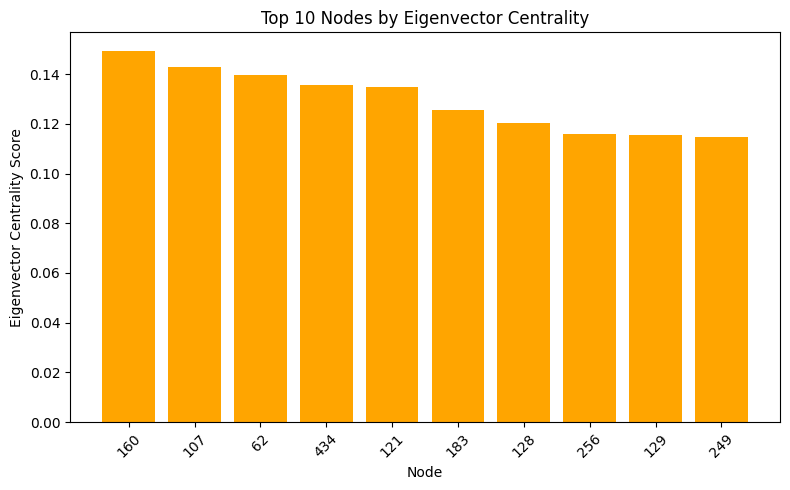

In [12]:
# CODE CELL: Visualize Top 10 Eigenvector Nodes
import matplotlib.pyplot as plt  # Make sure matplotlib is imported

# Assume 'eigenvector' is already computed, e.g., by nx.eigenvector_centrality(G)

sorted_eigen = sorted(eigenvector.items(), key=lambda x: x[1], reverse=True)
top10_eigen = sorted_eigen[:10]

nodes_eigen = [item[0] for item in top10_eigen]
scores_eigen = [item[1] for item in top10_eigen]

plt.figure(figsize=(8, 5))
plt.bar(nodes_eigen, scores_eigen, color="orange")
plt.xlabel("Node")
plt.ylabel("Eigenvector Centrality Score")
plt.title("Top 10 Nodes by Eigenvector Centrality")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

%%markdown

### Sample Solution Discussion
- We extracted the top 10 from the eigenvector dictionary.
- Created a simple bar chart to display centrality scores.
- **Interpretation**: High eigenvector nodes may be well-connected or linked to other well-connected nodes (perhaps departmental leaders or heavily emailed staff).

---

### Quiz: Centrality Understanding

1. **Q:** What does a node with **high betweenness centrality** imply in an email network?  

2. **Multiple Choice**  
   **Q:** Which metric best indicates a node that can quickly reach others in the network?  
   - a) Betweenness Centrality  
   - b) Closeness Centrality  
   - c) Eigenvector Centrality  
   - d) Clustering Coefficient  

3. **Q:** In your opinion, why might an influential node by eigenvector centrality not appear in the top 5 for betweenness centrality?





---

## 3.2 Graph Connectivity: Weak and Strong Components

### Objective
- Understand how nodes group into weakly or strongly connected components in the directed email network.

### Description
- **Weak Components**: Nodes are in the same component if they’re connected ignoring edge direction.  
- **Strong Components**: Nodes are mutually reachable following directed edges.


In [13]:
# CODE CELL: Compute Weak and Strong Components

num_weak_components = nx.number_weakly_connected_components(G)
num_strong_components = nx.number_strongly_connected_components(G)

print("Weakly connected components:", num_weak_components)
print("Strongly connected components:", num_strong_components)

# Find the largest strongly connected component (SCC)
largest_scc = max(nx.strongly_connected_components(G), key=len)
print("Size of largest SCC:", len(largest_scc))

Weakly connected components: 20
Strongly connected components: 203
Size of largest SCC: 803


### Practice Activity: Visualize Largest SCC

**Task**:  
1. Create a subgraph of the largest SCC.  
2. Draw the subgraph using NetworkX (limit to, say, 50–100 nodes if it’s still large).


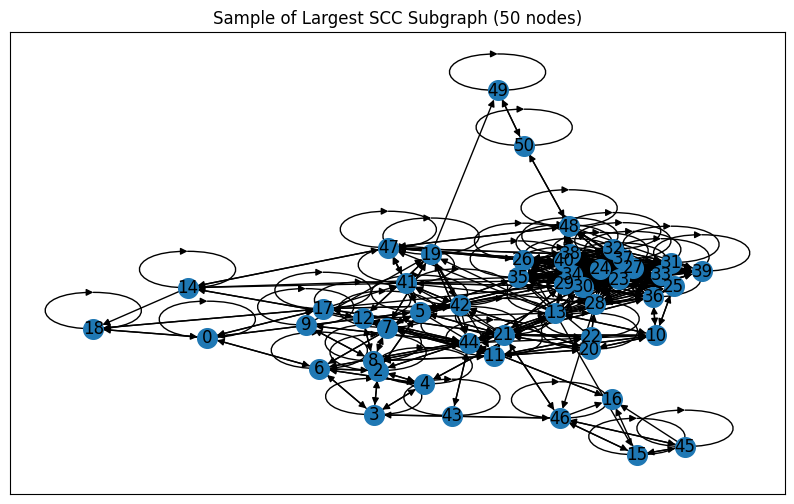

In [14]:
# CODE CELL: Visualize Largest SCC Subgraph

H = G.subgraph(largest_scc).copy()

# For demonstration, let's pick a sample of 50 nodes to visualize
sample_nodes = list(H.nodes())[:50]
H_sample = H.subgraph(sample_nodes)

plt.figure(figsize=(10, 6))
nx.draw_networkx(H_sample, with_labels=True, node_size=200)
plt.title("Sample of Largest SCC Subgraph (50 nodes)")
plt.show()

### Feedback / Discussion

- In a directed email graph, strong connectivity implies you can go from any node to any other node following edge directions.  
- The largest SCC in this dataset has about 803 nodes, indicating a significant portion of the network is mutually reachable.

---

## 3.3 Graph Density and Sparsity

### Objective
- Learn to calculate and interpret the density of the email network.

### Description
- **Density**: Proportion of possible edges that are actually present.  
- **Sparsity**: How close the network is to having very few edges relative to the maximum possible.



In [15]:
# CODE CELL: Compute Graph Density

density = nx.density(G)
print(f"Overall Graph Density: {density:.5f}")

# Optional: Compare subgraph density for a subset of nodes
# e.g., first 100 nodes or a random sample
subset_nodes = list(G.nodes())[:100]
subG = G.subgraph(subset_nodes)
sub_density = nx.density(subG)
print(f"Subgraph Density (100 nodes): {sub_density:.5f}")

Overall Graph Density: 0.02534
Subgraph Density (100 nodes): 0.13283


### Practice Activity

1. Implement the above pseudo-code if you have a department mapping.
2. Identify which departments have the highest average betweenness.
3. Hypothesize reasons (for example, certain admin or cross-department staff might handle more communication).

---

## 3.5 Additional Analysis, Summary, and Next Steps

### Key Takeaways
- The email-Eu-core dataset is a large directed network with notable connectivity and varying centralities.
- Betweenness, closeness, and eigenvector centralities can highlight different "important" nodes.
- The largest SCC indicates strong inter-department collaboration among a big subset of the network.

### Further Reading and References
- [NetworkX Documentation](https://networkx.org/documentation/stable/)
- [SNAP Datasets Overview](https://snap.stanford.edu/)
- Papers on organizational email networks and community detection.

### Optional Enhancements
- Community Detection: Compare ground-truth departments with algorithmic communities (Louvain, etc.).
- Interactive Visualizations: Use PyVis or Plotly for dynamic graph exploration.
- Temporal Analysis: If timestamps or message counts are available, explore how communication changes over time.

# End of Unit 3: Advanced Network Properties


## Answers to Quiz: Centrality Understanding

**Q1 (Short Answer):** What does a node with **high betweenness centrality** imply in an email network?
- **A1:** A node with high betweenness centrality in an email network implies that this node acts as a "bridge" or intermediary in communication flow. It lies on a significant number of shortest paths between other nodes, meaning that many emails would have to go through this node to reach other parts of the network. This makes them a potentially influential or critical node for information exchange.

**Q2 (Multiple Choice):** Which metric best indicates a node that can quickly reach others in the network?
- **A2:** b) **Closeness Centrality**

**Q3 (Short Answer):** In your opinion, why might an influential node by eigenvector centrality not appear in the top 5 for betweenness centrality?
- **A3:** An influential node by eigenvector centrality may not appear in the top 5 for betweenness centrality because eigenvector centrality measures the influence of a node based on the influence of its neighbors. A node can be highly connected to other highly connected nodes (thus high eigenvector), but not lie on many of the shortest paths between arbitrary pairs of nodes, which is how betweenness is measured. They may be influential in their local cluster, but not across the entire network as "bridges".